In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
plt.style.use("ggplot")


In [2]:
names1880 = pd.read_csv("yob1880.txt",names = ["name","sex","births"])

In [3]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
names1880.groupby("sex").births.sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [5]:
#to join everyyear's data into one
years = range(1880,2020)
pieces = []
columns = ["name","sex","births"]
for year in years :
    f = pd.read_csv("yob%d.txt"%year,names = columns)
    f["year"]= year
    pieces.append(f)
names = pd.concat(pieces,ignore_index = True)    

In [6]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989396,Zyheem,M,5,2019
1989397,Zykel,M,5,2019
1989398,Zyking,M,5,2019
1989399,Zyn,M,5,2019


In [7]:
total = names.groupby(["year","sex"]).births.sum()
total.unstack()
total = pd.DataFrame(total.unstack())
#plotting series would not consider diffferent columns so plot after converting into dataframe 

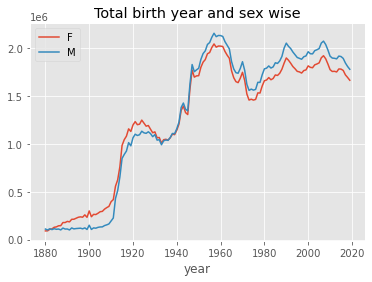

In [9]:
#to see  birth of male and female every year
total.plot(title = "Total birth year and sex wise")
plt.legend()

In [10]:
#another way to do the above thing
totals = names.pivot_table(values = "births",index = "year",columns = "sex",aggfunc = sum)

<AxesSubplot:xlabel='year'>

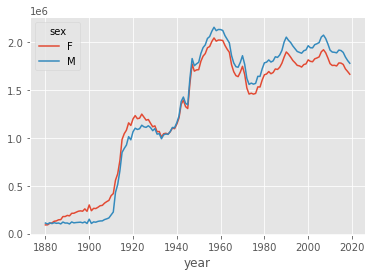

In [11]:
totals.plot()

In [12]:
#converted from series to dataframe 
type(total)

pandas.core.frame.DataFrame

In [13]:
type(totals)

pandas.core.frame.DataFrame

In [14]:
#to find proportion of each name in a year 
def proportion(group):
    group["prop"] = group["births"]/group["births"].sum()
    return group

names = names.groupby(["year","sex"]).apply(proportion)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989396,Zyheem,M,5,2019,0.000003
1989397,Zykel,M,5,2019,0.000003
1989398,Zyking,M,5,2019,0.000003
1989399,Zyn,M,5,2019,0.000003


In [16]:
#verifying prop column
names.groupby(["year","sex"]).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2017  M      1.0
2018  F      1.0
      M      1.0
2019  F      1.0
      M      1.0
Name: prop, Length: 280, dtype: float64

In [17]:
#get the top 1000 names for each sex/year combination
n = names.groupby(["year","sex"])
top1000 = pd.DataFrame(columns = names.columns)
for year,sex in n:
    each1000 = sex.nlargest(1000,"births")
    top1000 = top1000.append(each1000)

In [18]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1976347,Aayan,M,209,2019,0.000117
1976348,Dhruv,M,209,2019,0.000117
1976349,Seven,M,209,2019,0.000117
1976350,Stone,M,209,2019,0.000117


In [19]:
boys = top1000[top1000["sex"] == "M"]
girls =  top1000[top1000["sex"] == "F"]

In [20]:
name_fre = names.pivot_table(values = "births",index = "year",columns = "name",aggfunc = sum)

In [21]:
name_fre

name,Aaban,Aabha,Aabid,Aabidah,Aabir,Aabriella,Aada,Aadam,Aadan,Aadarsh,...,Zytaveon,Zytavion,Zytavious,Zyus,Zyva,Zyvion,Zyvon,Zyyanna,Zyyon,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,15.0,7.0,NaN,NaN,NaN,5.0,5.0,22.0,10.0,15.0,...,NaN,NaN,NaN,5.0,NaN,NaN,7.0,NaN,NaN,NaN
2016,9.0,7.0,5.0,NaN,5.0,11.0,NaN,18.0,NaN,11.0,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN
2017,11.0,NaN,NaN,NaN,NaN,6.0,NaN,18.0,8.0,15.0,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN


In [22]:
name_fre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Columns: 99444 entries, Aaban to Zzyzx
dtypes: float64(99444)
memory usage: 106.2 MB


In [23]:
subset = name_fre[["John","Camilo","Emma","Mary","Destin"]]

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>], dtype=object)

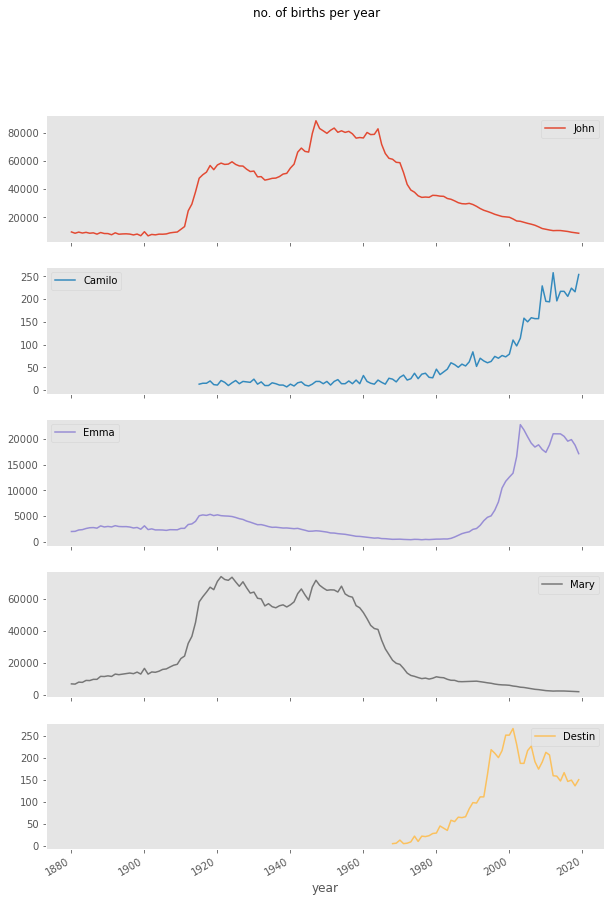

In [24]:
subset.plot(subplots = True,figsize = (10,15),title="no. of births per year",grid = False)


In [25]:
#we can see that name trends change over time 

In [26]:
div = pd.DataFrame(names.groupby(["year","sex"]).size().unstack())


Text(0, 0.5, 'count of names every year')

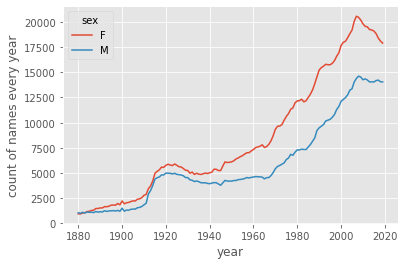

In [27]:
div.plot()
plt.ylabel("count of names every year")

In [26]:
#another way to find diversity of names with time is checking hoe the proportion of top 1000 names decreases with time

<AxesSubplot:title={'center':'sum of prop by year and sex'}, xlabel='year'>

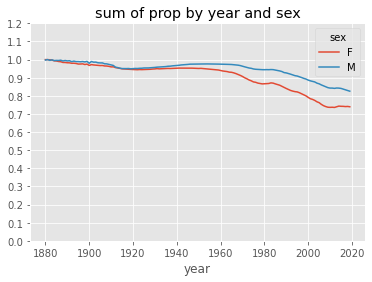

In [27]:
diversity =top1000.pivot_table(values ="prop",index = "year",columns = "sex",aggfunc = "sum")
diversity.plot(title = "sum of prop by year and sex",yticks = np.linspace(0,1.2,13))

In [28]:
#to find famous names in 50% of births in girls

In [29]:
df = girls[girls["year"]==2019]

In [30]:
prop_cumsum = df.sort_values(by = "prop",ascending = False)["prop"].cumsum()

In [31]:
prop_cumsum.values.searchsorted(0.5)+1#coz index starts with 0 

264

In [32]:
#in 2019 ,50% of girls have 263 name variance

In [33]:
#lets  see in 1900

In [34]:
df1 = girls[girls["year"]==1900]
prop_cumsum1 = df1.sort_values(by = "prop",ascending = False)["prop"].cumsum()
prop_cumsum1.values.searchsorted(0.5)+1#coz index starts with 0

49

In [35]:
#we can write this code as a functon and apply it on every group grouped by year and sex

In [36]:
def get_quantile_count(group,q = 0.5):
    prop_cumsum =  group.sort_values(by = "prop",ascending = False)["prop"].cumsum()
    return prop_cumsum.values.searchsorted(0.5)+1#coz index starts with 0
    

In [37]:
div = top1000.groupby(["year","sex"]).apply(get_quantile_count).unstack()

<AxesSubplot:xlabel='year'>

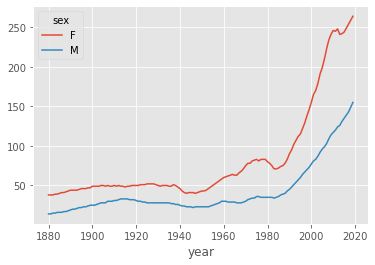

In [38]:
div.plot()

In [41]:
#the "last leter" revolution

In [42]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989396,Zyheem,M,5,2019,0.000003
1989397,Zykel,M,5,2019,0.000003
1989398,Zyking,M,5,2019,0.000003
1989399,Zyn,M,5,2019,0.000003


In [43]:
last_letters = names.name.map(lambda x: x[-1])

In [44]:
last_letters.name = "last_letter"

In [45]:
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
1989396    m
1989397    l
1989398    g
1989399    n
1989400    n
Name: last_letter, Length: 1989401, dtype: object

In [46]:
df1 = names.pivot_table(values = "births",index = last_letters,columns = ["sex","year"],aggfunc = sum)

In [47]:
df1

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2010      2011      2012   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   28881.0   27469.0   27220.0   
b                NaN      NaN      NaN  ...   39290.0   36687.0   34736.0   
c                NaN      NaN      NaN  ...   23356.0   23136.0   24287.0   
d             1027.0   1298.0   1374.0  ...   44843.0   43274.0   42501.0   
e            54353.0  66748.0  66662.0  ...  130296.0  128838.0  128552.0   
f                NaN      NaN      NaN  ...    2312.0    2302.0    2481.0   
g               25.0     44.0     28.0  ...    2697.0    2682.0    3805.0   
h             7141.0   8630.0   8825.0  ...   99340.0   98430.0   99095.0   
i              105.0    141.0    134.0  ...   43459.0   44570.0   47140.0   
j                NaN      NaN      NaN  ...    1479.0    1552.0    1499.0   
k               19.0     21.0     22.0  ...   35528.0   34265.0   34131.0   
l             6174.0   7900.0   8395.0  ...  135067.0  131919.0  129040.0   
m               90.0    123.0    137.0  ...   47361.0   50864.0   55095.0   
n             5512.0   6832.0   7103.0  ...  694761.0  690802.0  682522.0   
o               97.0    134.0    142.0  ...   81597.0   79400.0   78244.0   
p                NaN      NaN      NaN  ...    2432.0    2368.0    2526.0   
q                NaN      NaN      NaN  ...     345.0     357.0     337.0   
r              910.0   1207.0   1214.0  ...  167533.0  166239.0  167617.0   
s             2803.0   3581.0   3569.0  ...  124912.0  121487.0  122039.0   
t             3140.0   3816.0   3784.0  ...

In [48]:
#since there are many years.lets take four representative years

In [49]:
sub_df1 = df1.reindex(columns = [1880,1930,1980,2019],level = "year")

In [50]:
sub_df1

sex                F                                      M            \
year            1880      1930      1980      2019     1880      1930   
last_letter                                                             
a            31446.0  288392.0  628073.0  637918.0    776.0    3568.0   
b                NaN      20.0      79.0     555.0    509.0    3021.0   
c                NaN      14.0     404.0     957.0    349.0    1785.0   
d              609.0   12138.0    2024.0    3746.0   9177.0  183175.0   
e            33381.0  305482.0  310650.0  295596.0  13493.0  131872.0   
f                NaN       NaN      14.0     141.0    108.0     461.0   
g                7.0      89.0     576.0     763.0    147.0    1389.0   
h             4863.0   39457.0   71298.0  116540.0   4049.0   47229.0   
i               61.0    2210.0   57532.0   72054.0    200.0     693.0   
j                NaN       NaN       9.0     154.0      NaN       NaN   
k               13.0     234.0     880.0     532.0   4720.0   33833.0   
l             2541.0   27918.0   68586.0   37308.0   5089.0   69596.0   
m               58.0    1550.0    2338.0    6439.0  11259.0   53941.0   
n             3008.0  121031.0  157691.0  192443.0  16929.0  152604.0   
o               30.0    4152.0    3085.0    3323.0    933.0   20409.0   
p                NaN      28.0      74.0     112.0    282.0    3910.0   
q                NaN       NaN       NaN      72.0      NaN       NaN   
r              481.0   11458.0   99338.0   54630.0   7454.0   51349.0   
s             1391.0   76234.0    9086.0   19894.0  18453.0  140654.0   
t             2152.0   29458.0    9193.0   24672.0   6948.0  100672.0   
u              380.0     894.0     319.0    1004.0     25.0     215.0   
v                NaN       NaN      12.0     487.0     33.0      51.0   
w                NaN      57.0     440.0    6857.0    853.0    4266.0   
x                NaN      33.0     156.0    3145.0    304.0    3095.0   
y            10467.0  203670.0  237470.0  184979.0   8371.0   89348.0   
z              106.0    1432.0    1011.0    1052.0     29.0     263.0   

sex                              
year             1980      2019  
last_letter                      
a             42431.0   32304.0  
b             10152.0   20586.0  
c             30418.0   18497.0  
d            129542.0   40585.0  
e            112508.0  118093.0  
f              1642.0    2826.0  
g              6558.0    4961.0  
h             64212.0   96696.0  
i              5549.0   53754.0  
j               264.0    1467.0  
k             58711.0   35994.0  
l            177291.0  115810.0  
m             50096.0   58642.0  
n            435406.0  576516.0  
o             50070.0  102312.0  
p              8580.0    2435.0  
q                81.0     345.0  
r             94514.0  167741.0  
s            161414.0  136087.0  
t             77934.0   57920.0  
u              1601.0    5192.0  
v               243.0    2915.0  
w             59940.0   18750.0  
x              3139.0   20512.0  
y            201277.0   85536.0  
z               992.0    3472.0

In [51]:
sub_df1.sum()

sex  year
F    1880      90994.0
     1930    1125951.0
     1980    1660338.0
     2019    1665373.0
M    1880     110490.0
     1930    1097399.0
     1980    1784565.0
     2019    1779948.0
dtype: float64

In [52]:
prop = sub_df1/sub_df1.sum()

In [53]:
prop

sex                 F                                       M            \
year             1880      1930      1980      2019      1880      1930   
last_letter                                                               
a            0.345583  0.256132  0.378280  0.383048  0.007023  0.003251   
b                 NaN  0.000018  0.000048  0.000333  0.004607  0.002753   
c                 NaN  0.000012  0.000243  0.000575  0.003159  0.001627   
d            0.006693  0.010780  0.001219  0.002249  0.083057  0.166917   
e            0.366848  0.271310  0.187100  0.177495  0.122120  0.120168   
f                 NaN       NaN  0.000008  0.000085  0.000977  0.000420   
g            0.000077  0.000079  0.000347  0.000458  0.001330  0.001266   
h            0.053443  0.035043  0.042942  0.069978  0.036646  0.043037   
i            0.000670  0.001963  0.034651  0.043266  0.001810  0.000631   
j                 NaN       NaN  0.000005  0.000092       NaN       NaN   
k            0.000143  0.000208  0.000530  0.000319  0.042719  0.030830   
l            0.027925  0.024795  0.041308  0.022402  0.046058  0.063419   
m            0.000637  0.001377  0.001408  0.003866  0.101901  0.049153   
n            0.033057  0.107492  0.094975  0.115555  0.153217  0.139060   
o            0.000330  0.003688  0.001858  0.001995  0.008444  0.018598   
p                 NaN  0.000025  0.000045  0.000067  0.002552  0.003563   
q                 NaN       NaN       NaN  0.000043       NaN       NaN   
r            0.005286  0.010176  0.059830  0.032803  0.067463  0.046792   
s            0.015287  0.067706  0.005472  0.011946  0.167011  0.128170   
t            0.023650  0.026163  0.005537  0.014815  0.062884  0.091737   
u            0.004176  0.000794  0.000192  0.000603  0.000226  0.000196   
v                 NaN       NaN  0.000007  0.000292  0.000299  0.000046   
w                 NaN  0.000051  0.000265  0.004117  0.007720  0.003887   
x                 NaN  0.000029  0.000094  0.001888  0.002751  0.002820   
y            0.115030  0.180887  0.143025  0.111074  0.075763  0.081418   
z            0.001165  0.001272  0.000609  0.000632  0.000262  0.000240   

sex                              
year             1980      2019  
last_letter                      
a            0.023777  0.018149  
b            0.005689  0.011566  
c            0.017045  0.010392  
d            0.072590  0.022801  
e            0.063045  0.066346  
f            0.000920  0.001588  
g            0.003675  0.002787  
h            0.035982  0.054325  
i            0.003109  0.030200  
j            0.000148  0.000824  
k            0.032899  0.020222  
l            0.099347  0.065064  
m            0.028072  0.032946  
n            0.243984  0.323895  
o            0.028057  0.057480  
p            0.004808  0.001368  
q            0.000045  0.000194  
r            0.052962  0.094239  
s            0.090450  0.076456  
t            0.043671  0.032540  
u            0.000897  0.002917  
v            0.000136  0.001638  
w            0.033588  0.010534  
x            0.001759  0.011524  
y            0.112788  0.048055  
z            0.000556  0.001951

<AxesSubplot:title={'center':'last letter trend  for female'}, xlabel='last_letter'>

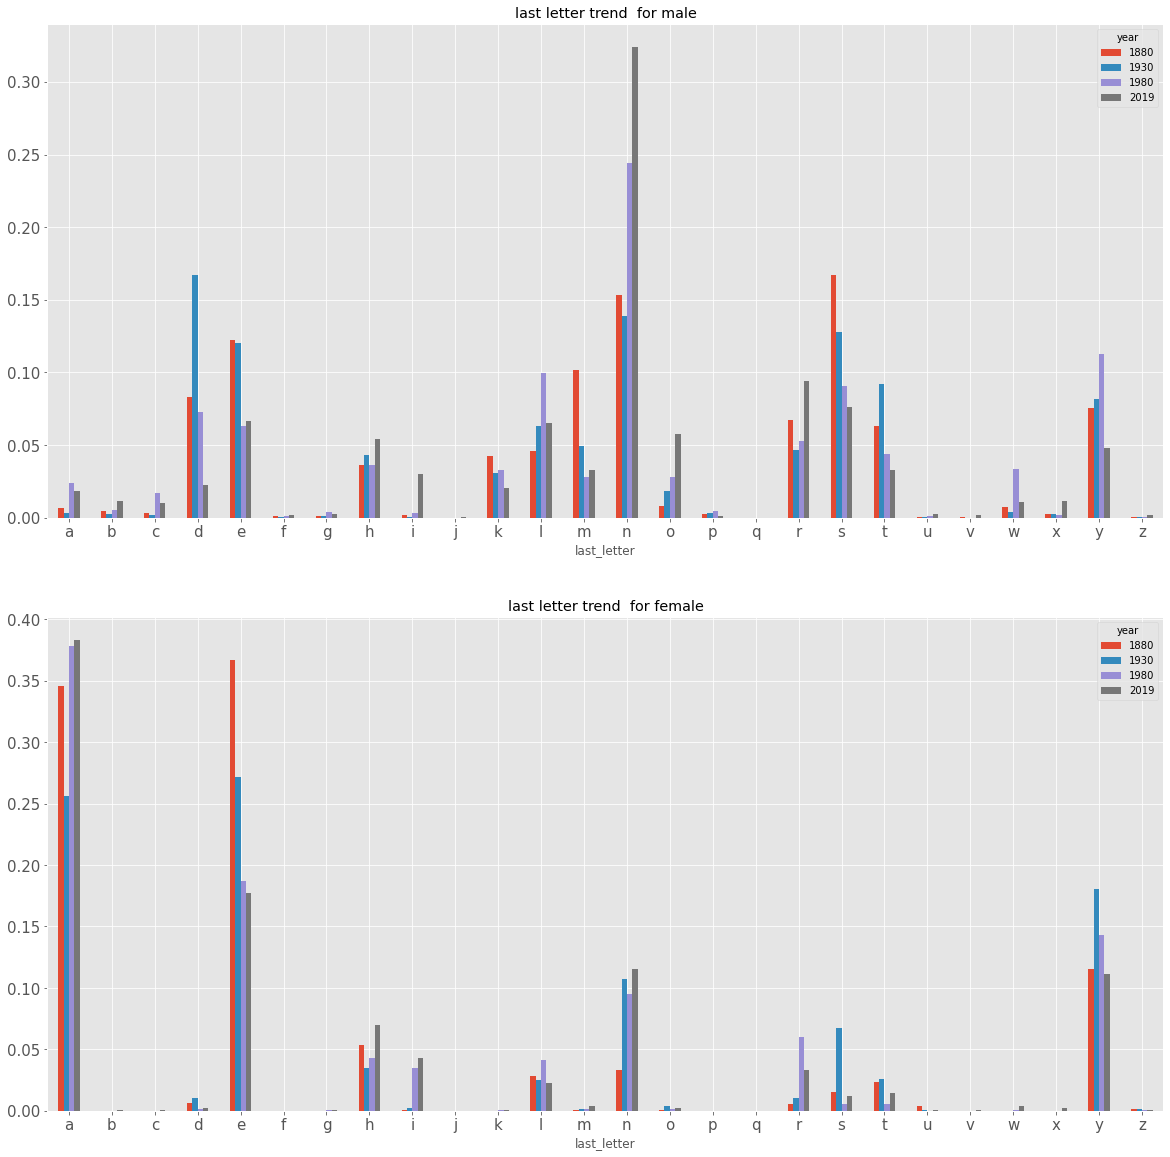

In [70]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize = (20,20))
prop["M"].plot(kind = "bar",rot = 0,ax = ax1,fontsize = 15,legend = True,title ="last letter trend  for male")
prop["F"].plot(kind = "bar",rot = 0,ax = ax2,fontsize = 15,title ="last letter trend  for female")


In [71]:
#we can choose famous letter from above and display its  trend in the century

In [72]:
prop1 = df1/df1.sum()

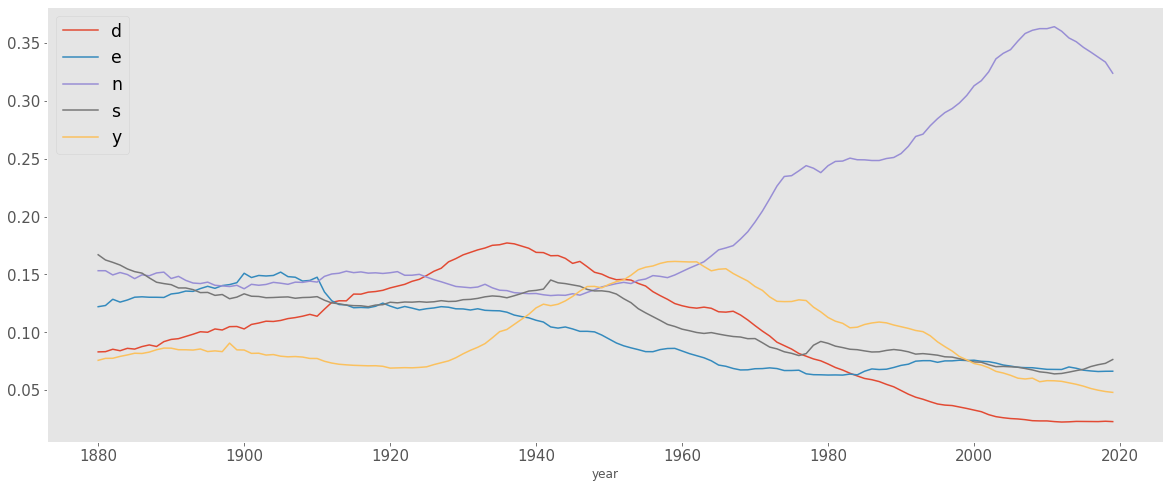

In [73]:
prop2 = prop1.loc[["d","e","n","s","y"]]["M"].T
prop2.plot(figsize = (20,8),grid =False,fontsize =15,last letter trend for male )
plt.legend(fontsize = "xx-large")

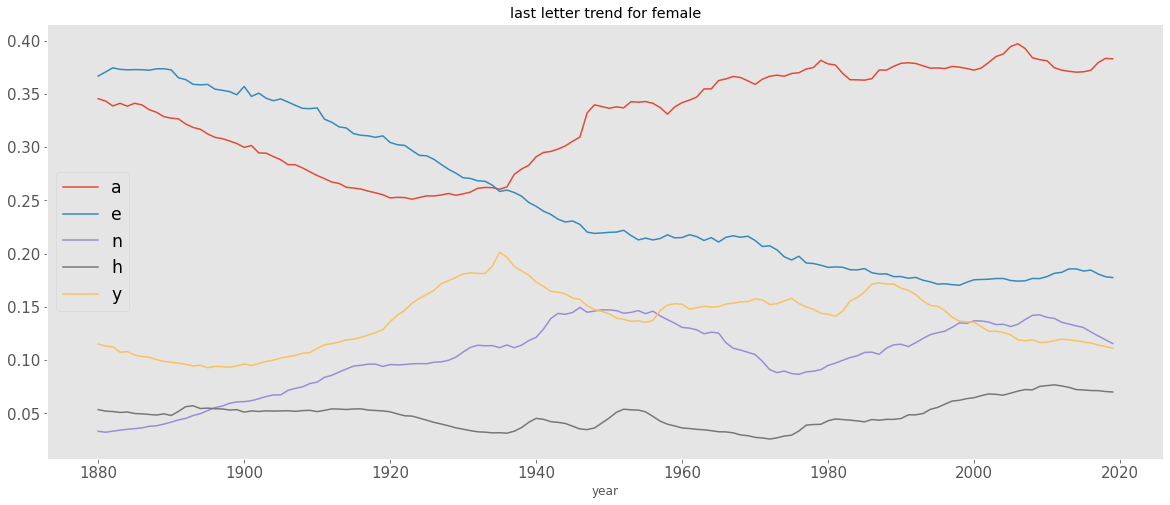

In [76]:
prop3 = prop1.loc[["a","e","n","h","y"]]["F"].T
prop3.plot(figsize = (20,8),grid =False,fontsize =15,title = "last letter trend for female")
plt.legend(fontsize = "xx-large")

In [77]:
#boy names that became girls name

In [78]:
all_names = pd.Series(top1000.name.unique())

In [79]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [80]:
lesley_like

632     Leslie
2307    Lesley
4257    Leslee
4725     Lesli
6095     Lesly
dtype: object

In [81]:
filtered = names[names.name.isin(lesley_like)]

In [82]:
filtered

,name,sex,births,year,prop
654,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2522,Leslie,F,11,1881,0.000120
3072,Leslie,M,92,1881,0.000913
4593,Leslie,F,9,1882,0.000083
...,...,...,...,...,...
1958761,Lesly,F,173,2019,0.000104
1960585,Lesley,F,51,2019,0.000031
1965806,Lesli,F,13,2019,0.000008
1974318,Leslee,F,5,2019,0.000003


In [83]:
filtered.groupby("name").births.sum()

name
Leslee      4967
Lesley     38858
Lesli       5703
Leslie    380439
Lesly      14764
Name: births, dtype: int64

In [84]:
table=filtered.pivot_table("births",index = "year",columns = "sex",aggfunc = "sum")
table = table.div(table.sum(1),axis = 0)

<AxesSubplot:title={'center':'intermixing of male and female names over years'}, xlabel='year'>

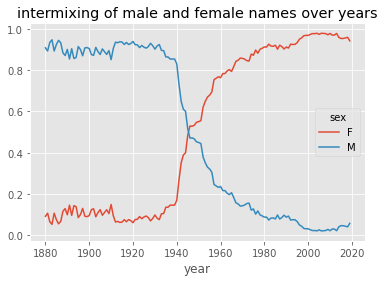

In [85]:
table.plot(title = "intermixing of male and female names over years")